# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19202300,
            "id": 1,
            "last_updated": 1667965793,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 348804135181,
                    "percent_change_1h": -0.0305243834318607,
                    "percent_change_24h": -10.1642520109998,
                    "percent_change_7d": -10.745598838452,
                    "percentage_change_1h": -0.0305243834318607,
                    "percentage_change_24h": -10.1642520109998,
                    "percentage_change_7d": -10.745598838452,
                    "price": 18287.91,
                    "volume_24h": 93175587503
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19202300,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120523505,
            "id": 1027,
            "last_updated": 1667965778,
            "max_supply": 120523505,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 156374517242,
                    "percent_change_1h": -0.62467786379885,
                    "percent_change_24h": -14.445361468281,
                    "percent_change_7d": -17.3418039164483,
                    "percentage_change_1h": -0.62467786379885,
                    "percentage_change_24h": -14.445361468281,
                    "percentage_change_7d": -17.3418039164483,
                    "price": 1306.31,
                    "volume_24h": 33243073992
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120523505,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryp

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f' Current price of BTC is {btc_price}')


 Current price of BTC is 18287.91


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f' Current price of ETH is {eth_price}')


 Current price of ETH is 1306.31


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins*btc_price

# Print current value of your holding in BTC
print(f' Current value of your holding in BTC is {btc_value}')


 Current value of your holding in BTC is 21945.492


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins*eth_price

# Print current value of your holding in ETH
print(f' Current value of your holding in ETH is {eth_price}')


 Current value of your holding in ETH is 1306.31


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f' Current wallet balance is {total_crypto_wallet}')


 Current wallet balance is 28868.934999999998


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe='1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [22]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])


# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [24]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price of AGG is {agg_close_price}")


The closing price of AGG is 119.43


In [25]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print the AGG closing price
print(f"The closing price of SPY is {agg_close_price}")



The closing price of SPY is 119.43


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [28]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares*agg_close_price

# Print the current value of the bond portfolio
print(f'The current value of the bond portfolio is {agg_value}')


The current value of the bond portfolio is 23886.0


In [29]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares*spy_close_price

# Print the current value of the stock portfolio
print(f'The current value of the stock portfolio is {spy_value}')


The current value of the stock portfolio is 36802.7


In [30]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The currwent balance of the stock and bond portion of the portfolio is {total_stocks_bonds}')


The currwent balance of the stock and bond portion of the portfolio is 60688.7


In [31]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f'The total current cryptocurrency wallet balance is {total_portfolio}')


The total current cryptocurrency wallet balance is 89557.635


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [32]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)
    

[28868.934999999998, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [33]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    data=savings_data, 
    index=['crypto', 'stock/bond'],
    columns=['amount']    
)

# Display the savings_df DataFrame
savings_df


,amount
crypto,28868.935
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of member portfolio'}, ylabel='amount'>

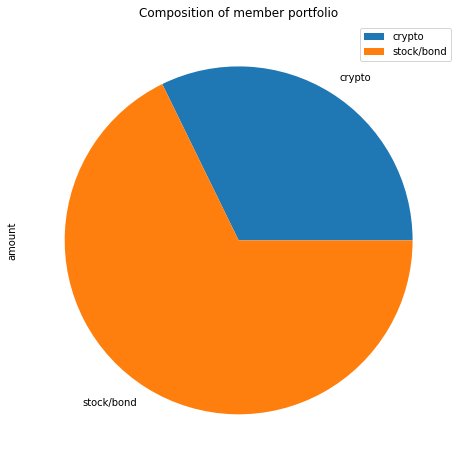

In [39]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Composition of member portfolio', figsize=(8,8))


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [42]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [43]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congrats, you have enough money in this fund")
elif total_portfolio == emergency_fund_value:
    print("Congrats, on reaching this important financial goal")
else :
    print(f"Sorry, you are {total_portfolio - emergency_fund} dollars away from reaching your goal.")


Congrats, you have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [44]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2017-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [49]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_prices = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Display both the first and last five rows of the DataFrame
df_prices.head()
df_prices.tail()


AGG                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-08-03 04:00:00+00:00  119.37  119.40  119.1903  119.40  13014535   
2020-08-04 04:00:00+00:00  119.42  119.63  119.4200  119.63  10935154   
2020-08-05 04:00:00+00:00  119.39  119.49  119.3100  119.40  17377874   
2020-08-06 04:00:00+00:00  119.62  119.73  119.5300  119.57   4608710   
2020-08-07 04:00:00+00:00  119.66  119.73  119.3950  119.43   5559066   

                                                        SPY                  \
                          trade_count        vwap      open    high     low   
timestamp                                                                     
2020-08-03 04:00:00+00:00       36359  119.282420  328.3200  329.62  327.73   
2020-08-04 04:00:00+00:00       39113  119.541666  327.8600  330.06  327.86   
2020-08-05 04:00:00+00:00       42313  119.387245  331.4700  332.39  331.18   
2020-08-06 04:00:00+00:00       15938  119.604199  331.4799  334.46  331.13   
2020-08-07 04:00:00+00:00       15246  119.475306  333.2800  334.88  332.30   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  328.67  53078112      288003  328.658795  
2020-08-04 04:00:00+00:00  330.00  41917896      250899  329.057592  
2020-08-05 04:00:00+00:00  332.03  42870955      241416  331.791643  
2020-08-06 04:00:00+00:00  334.32  43679448      290036  332.939600  
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [63]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_30year.portfolio_data.head()


AGG                                      \
                             open    high       low    close   volume   
timestamp                                                               
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.685  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.580  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.670  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.800  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.870  1913253   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00        7755  109.674876          NaN  247.49   
2017-08-08 04:00:00+00:00       12663  109.577636    -0.000957  247.51   
2017-08-09 04:00:00+00:00       11031  109.771749     0.000821  246.47   
2017-08-10 04:00:00+00:00       12437  109.776611     0.001185  246.29   
2017-08-11 04:00:00+00:00       10113  109.860974     0.000638  244.02   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2017-08-07 04:00:00+00:00  247.87  247.37  247.8400   31995021      100111   
2017-08-08 04:00:00+00:00  248.91  246.83  247.2700   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.2700   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.7599  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.1100   74869947      278786   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  247.668698          NaN  
2017-08-08 04:00:00+00:00  247.739709    -0.002300  
2017-08-09 04:00:00+00:00  246.791421     0.000000  
2017-08-10 04:00:00+00:00  245.027847    -0.014195  
2017-08-11 04:00:00+00:00  244.222867     0.001436

In [64]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 110.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 120.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 130.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 140.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 150.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 160.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 170.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 180.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 190.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 200.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 210.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 220.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 230.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 240.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 250.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 260.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 270.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 280.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 290.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 300.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 310.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 320.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 330.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 340.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 350.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 360.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 370.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 380.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 390.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 400.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 410.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 420.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 430.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 440.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 450.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 460.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 470.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 480.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 490.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007651,0.995796,0.995412,0.994955,0.994875,0.999214,0.996634,0.994620,0.998610,0.988671,...,1.008195,0.995228,0.999910,0.994030,1.000658,1.000044,0.996030,1.000894,1.006217,0.993851
2,1.013934,1.000358,0.991474,0.989694,0.994797,0.996596,0.988409,1.000872,0.992188,0.985095,...,1.020498,0.995662,0.993553,0.998987,1.008599,0.997238,0.997074,0.997377,0.999133,0.986243
3,1.022462,1.008604,0.994088,0.990852,0.996184,1.006901,0.988178,1.003281,0.990157,0.995369,...,1.025137,0.996606,0.992783,1.000671,1.015248,0.996849,0.998552,1.013154,0.996705,0.987573
4,1.013736,1.014007,0.992313,0.996635,1.002522,1.002297,0.996483,0.996192,0.991213,1.001855,...,1.026377,1.000311,0.998770,1.005427,1.026262,1.005468,1.007809,1.012387,0.985501,0.987397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.940677,5.742319,4.593749,10.685227,5.843159,9.638075,14.768575,6.719091,5.578731,6.845917,...,10.275022,7.227485,11.131776,13.966538,1.829450,9.067247,4.310765,2.944589,10.804357,9.342961
7557,4.935884,5.726840,4.605800,10.788572,5.843164,9.577198,14.791302,6.768652,5.571158,6.893532,...,10.421465,7.251592,11.192752,13.968981,1.827380,9.162255,4.315499,2.936444,10.816042,9.361155
7558,4.977701,5.747266,4.660069,10.756613,5.836078,9.544519,14.867481,6.773930,5.549553,6.851778,...,10.384620,7.288767,11.190650,13.863532,1.814522,9.169020,4.289260,2.926033,10.935801,9.419227
7559,5.001931,5.824823,4.687508,10.664548,5.832886,9.553652,14.966908,6.795024,5.554892,6.939398,...,10.404938,7.295052,11.245007,13.976069,1.809855,9.268962,4.309683,2.913499,10.996442,9.410991


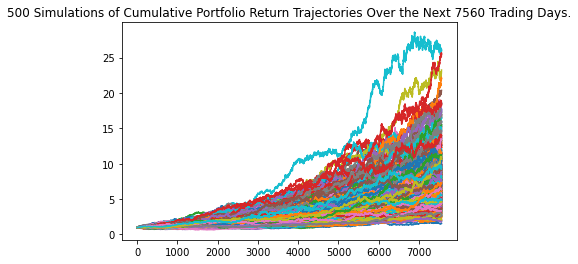

In [65]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_30year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

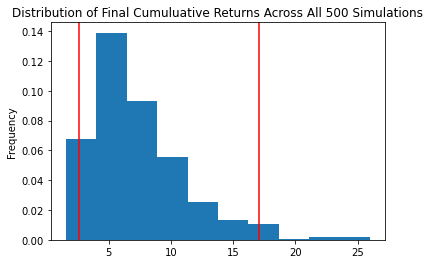

In [66]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_30year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [67]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_30year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              7.406131
std               3.794635
min               1.559969
25%               4.794161
50%               6.405982
75%               9.103269
max              26.015896
95% CI Lower      2.624186
95% CI Upper     17.109615
Name: 7560, dtype: float64


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [68]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f' The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}')


 The current balance of the stock and bond portion of the portfolio is 60688.7


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the value of the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that the value of the portfolio over the next 30 years will end within in the range of $ 159258.43 and $ 1038360.29.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [85]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_10year.portfolio_data.head()


AGG                                      \
                             open    high       low    close   volume   
timestamp                                                               
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.685  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.580  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.670  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.800  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.870  1913253   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-07 04:00:00+00:00        7755  109.674876          NaN  247.49   
2017-08-08 04:00:00+00:00       12663  109.577636    -0.000957  247.51   
2017-08-09 04:00:00+00:00       11031  109.771749     0.000821  246.47   
2017-08-10 04:00:00+00:00       12437  109.776611     0.001185  246.29   
2017-08-11 04:00:00+00:00       10113  109.860974     0.000638  244.02   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2017-08-07 04:00:00+00:00  247.87  247.37  247.8400   31995021      100111   
2017-08-08 04:00:00+00:00  248.91  246.83  247.2700   61719353      192921   
2017-08-09 04:00:00+00:00  247.31  246.06  247.2700   62632619      223650   
2017-08-10 04:00:00+00:00  246.44  243.70  243.7599  120418270      424321   
2017-08-11 04:00:00+00:00  244.80  243.75  244.1100   74869947      278786   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-07 04:00:00+00:00  247.668698          NaN  
2017-08-08 04:00:00+00:00  247.739709    -0.002300  
2017-08-09 04:00:00+00:00  246.791421     0.000000  
2017-08-10 04:00:00+00:00  245.027847    -0.014195  
2017-08-11 04:00:00+00:00  244.222867     0.001436

In [86]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 110.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 120.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 130.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 140.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 150.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 160.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 170.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 180.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 190.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 200.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 210.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 220.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 230.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 240.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 250.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 260.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 270.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 280.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 290.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 300.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 310.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 320.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 330.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 340.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 350.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 360.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 370.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 380.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 390.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 400.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 410.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 420.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 430.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 440.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 450.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 460.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 470.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 480.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

Running Monte Carlo simulation number 490.


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997957,1.005284,1.000682,1.000976,0.999911,0.998227,0.996059,0.999140,0.994629,0.995589,...,1.002197,0.997747,1.002476,1.007250,0.994170,1.002208,0.999071,1.000085,0.995964,1.001682
2,0.998582,1.007128,1.004887,1.001819,0.997649,0.996118,0.999483,0.996792,0.999486,0.994937,...,1.002101,0.996147,1.001500,1.012181,0.990886,1.002700,0.993322,1.000359,0.992660,0.999646
3,0.997904,1.005620,1.005798,0.997192,0.997065,1.000192,0.996139,0.995405,1.002786,0.998156,...,1.004398,0.992484,1.000386,1.009078,0.996235,1.002200,0.987158,0.995837,0.997752,1.001718
4,0.997924,1.007381,1.004759,0.999226,0.994231,0.999757,0.986802,0.993253,0.993786,0.999300,...,1.002183,0.988510,0.999954,1.010523,0.998955,0.997725,0.988414,0.988816,0.988723,1.003963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.917168,1.480363,1.925065,1.606670,2.146317,1.524061,1.307800,1.358028,1.055064,1.003699,...,2.315879,1.976111,1.471951,1.396400,1.145663,2.256666,2.001284,1.645644,1.941220,1.989545
2517,1.915411,1.483826,1.926922,1.601672,2.138663,1.533669,1.308567,1.356484,1.050501,1.005634,...,2.316860,1.981378,1.466209,1.396721,1.152691,2.254374,1.998730,1.654053,1.934103,1.994420
2518,1.921501,1.482147,1.922278,1.589337,2.139586,1.530661,1.303225,1.353997,1.049221,1.002617,...,2.313875,1.991809,1.461259,1.390848,1.155497,2.258854,1.994648,1.654019,1.931985,1.991147
2519,1.914918,1.482666,1.922412,1.589309,2.130531,1.525836,1.308220,1.345285,1.052965,1.004110,...,2.298811,1.989960,1.464848,1.390731,1.155835,2.261521,1.994167,1.658486,1.930624,1.987769


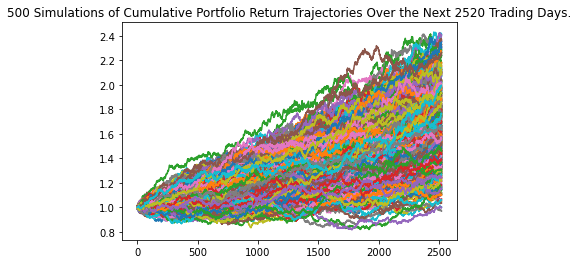

In [87]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_10year.plot_simulation()


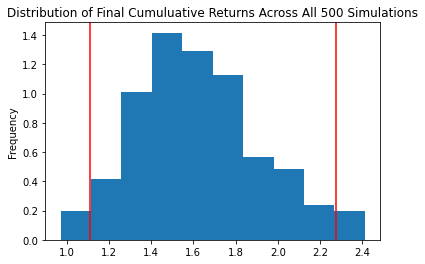

In [89]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_dis_line_plot = MC_10year.plot_distribution()


In [90]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_10year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              1.624391
std               0.293757
min               0.971172
25%               1.415595
50%               1.587145
75%               1.812253
max               2.412061
95% CI Lower      1.111423
95% CI Upper      2.274574
Name: 2520, dtype: float64


/Users/lisetlopez/Documents/FinTech/Week_5/starter_code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [92]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f' The current balance of the stock and bond portion of the portfolio is {total_stocks_bonds}')


 The current balance of the stock and bond portion of the portfolio is 60688.7


In [93]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the value of the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that the value of the portfolio over the next 10 years will end within in the range of $ 67450.82 and $ 138040.96.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?